<h1>Chapter 4 | Case Study A | <b>Management Quality and Firm Size: Describing Patterns of Association</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to reproduce the code in the original case studies repo, visualize the distribution of the data, group quantitative values using qualitative definitions, as well as ploting stacked bar charts to visualize the resulted qualitative binning. We will be using the <code>wms-management-survey</code> dataset.</p>
<h2>1. Read the data</h2>

In [32]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [33]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_case_studies/ch04-management_firm_size/data/clean/"
output = f"{dirname}da_case_studies/ch04-management_firm_size/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"

sys.path.append(func)
func

'c:\\Users\\Felipe\\python_work\\Projects\\bk_data_analysis\\da_case_studies/ch00-tech_prep/'

In [34]:
# import the prewritten helper functions
from py_helper_functions import *

In [35]:
# Load the dataset
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [36]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>1.1 Sample selection</h3>
<p>Our first step is to reproduce the book's sample selection. It analyzed a cross-section of Mexican firms from the 2013 wave of the survey. The author also excluded firms with fewer than 100 employees and more than 5000 employees.</p>

In [37]:
df = df.loc[
    lambda x: (x["country"] == "Mexico") &
              (x["wave"] == 2013) &
              (x["emp_firm"] >= 100) &
              (x["emp_firm"] <= 5000)
    ]

In [38]:
df["emp_firm"].describe()

count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

<p>Perfect. We have a sample of 300 firms, with min and max sizes between the established values. We can now save our workfile so that we can work it later on.</p>

In [39]:
df.to_csv(f"{data_out}ch04-wms_workfile.csv", index=False)

<h2>2. Visualizing the distribution of management score</h2>
<p>Let's take a look at the distribution of the management score, which is a simple average of 18 score variables ranging from 1 to 5.</p>

In [40]:
df.loc[:, ["management", "emp_firm"]].describe()

,management,emp_firm
count,300.000000,300.000000
mean,2.938519,761.140000
std,0.601059,977.035685
min,1.277778,100.000000
25%,2.555556,200.000000
50%,2.944444,353.000000
75%,3.277778,900.000000
max,4.611111,5000.000000


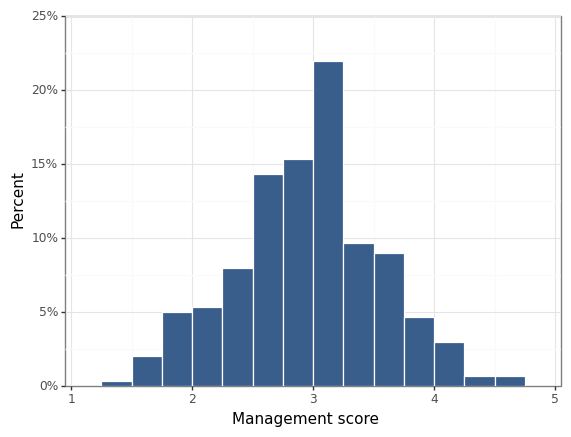

<ggplot: (136974608114)>

In [41]:
ggplot(df, aes(x="management")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0],
    color="white",
    binwidth=0.25,
    boundary=0,
    closed="left",
) + labs(x="Management score", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(1, 5)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.25),
    breaks=seq(0, 0.26, by=0.05),
    labels=percent_format()
) + theme_bw()

<p>Let's take a look at the histogram:</p>
<ul>
<li>The mean is <b>2.9</b>, while the median is also <b>2.9</b>.</li>
<li>The standard deviation is <b>0.6</b>.</li>
<li>We can tell that the mode is around <b>3.1</b>.</li>
</ul>
<h2>3. Visualizing the distribution of employment</h2>
<p>Let's take a look at the summary statistic of Mexican firms by their respective size, which is measured by the number of employees employed by the firm.</p>

In [42]:
df.loc[:, "emp_firm"].describe()

count     300.000000
mean      761.140000
std       977.035685
min       100.000000
25%       200.000000
50%       353.000000
75%       900.000000
max      5000.000000
Name: emp_firm, dtype: float64

<p>Observations:</p>
<ul>
<li>The mean is <b>761</b>.</li>
<li>The median is <b>353</b>.</li>
<li>Because the mean is far higher than the median, we can expect some significant <b>skwewness</b> represented by a long right tail.</li>
<li>The standard deviation is <b>977</b>, which supports the argument that we are dealing with a skewed distribution.</li>
</ul>
<p>Let's first plot a histogram using a normal scale.</p>

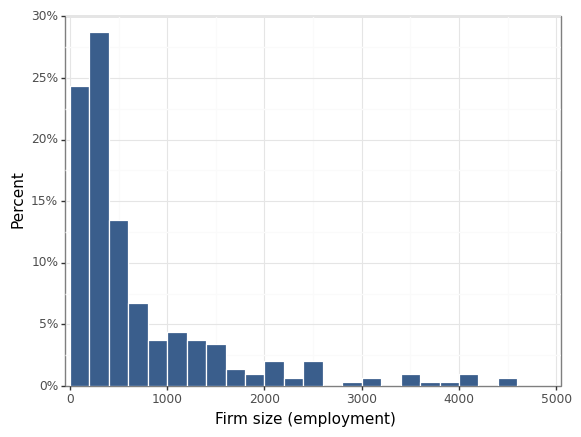

<ggplot: (136974628372)>

In [43]:
ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
) + labs(x="Firm size (employment)", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.3),
    breaks=seq(0, 0.5, by=0.05),
    labels=percent_format(),
) + theme_bw()

<p>As we can see, most Mexican firms have less than 1000 employees. There are a few extreme values, with two firms with around 4500 employees and three with 4000 employees.</p>
<p>To make this distrbution more symmetric, we can plot a histogram formatted by the <b>lognormal distribution</b>.</p>

In [44]:
df["lnemp_firm"] = np.log(df["emp_firm"])
df["lnemp_firm"].describe()

count    300.000000
mean       6.081850
std        0.992700
min        4.605170
25%        5.298317
50%        5.866432
75%        6.802395
max        8.517193
Name: lnemp_firm, dtype: float64

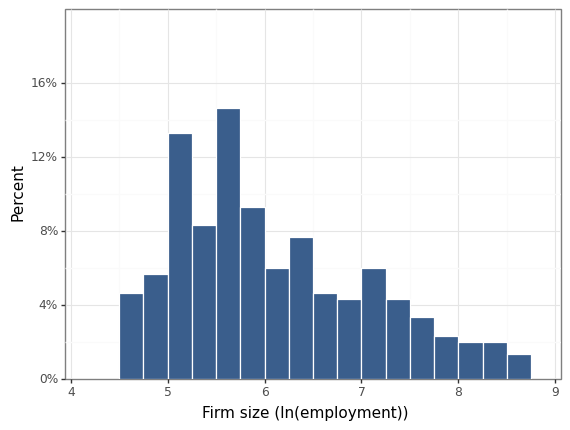

<ggplot: (136975616679)>

In [45]:
ggplot(df, aes(x="lnemp_firm"))  + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0], 
    color="white", 
    binwidth=0.25, 
    boundary=0, 
    closed="left"
) + labs(x="Firm size (ln(employment))", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9) 
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.2),
    breaks=seq(0, 0.2, by=0.04),
    labels=percent_format(),
) + theme_bw()

<p>We notice that the distribution is not as skewed as before, yet it still presents a longer tail to the right. The distribution, nonetheless, is much more symmetrical. In conclusion, the distribution of employment is skewed; while closer to lognormal than normal, the latter is still not the best approach.</p>
<h2>4. Conditional probabilities | Binning firm size and visualize the quality of specific management practices accordingly</h2>
<p>As a reminder, <b>conditional probability</b> of an event means the probability of an event if another event (the conditioning event) happens. Because both the management score and employment are quantitative variables with many values, they are not adequate for an investigation conditional probabilities.</p>
<p>To overcome this issue, we will create a <b>qualitative</b> variable by creating three bins of employment: <b>small, medium, and large</b>. Let's follow the book's example and bind the bins by three intervals: 100-199, 200-999, and 1000+.


In [46]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, pd.np.nan)
df["emp3bins"] = np.where((df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"])
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [47]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205,lnemp_firm,emp3bins
10859,7778,2013,mx,Mexico,36.0,3.333333,3.5,3.6,2.8,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.521461,2.0
10861,7780,2013,mx,Mexico,37.0,3.500000,2.5,4.0,3.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.411833,3.0
10862,7781,2013,mx,Mexico,30.0,3.888889,4.0,4.8,4.0,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.669881,2.0
10865,7783,2013,mx,Mexico,22.0,1.833333,1.0,2.4,1.8,1.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857933,2.0
10866,7784,2013,mx,Mexico,20.0,2.222222,2.5,2.8,1.8,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,2.0


In [48]:
df["emp3bins"].describe()

count    300.000000
mean       2.000000
std        0.693978
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

<h3>4.1 Plotting stacked charts - Describing patterns of association</h3>
<p>We will use stacked charts to visualize conditional probabilities. Because we have 15 conditional probabilities for each management score (that is, the probability of each of the 5 values of y by each of the three values of x), a stacked bar chart will be of great assistance. Let's create the DataFrames for our job.</p>
<h4>4.1.1 Stacked bar chart | Figure 4.3 (a) Lean management</h4>


In [49]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "lean1"]].groupby(["emp3bins", "lean1"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "lean1", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1["emp3bins"] == 1, "Percent"] = round(df1.loc[df1["emp3bins"] == 1, "Count"]/group_counts[1],5)
df1.loc[df1["emp3bins"] == 2, "Percent"] = round(df1.loc[df1["emp3bins"] == 2, "Count"]/group_counts[2],5)
df1.loc[df1["emp3bins"] == 3, "Percent"] = round(df1.loc[df1["emp3bins"] == 3, "Count"]/group_counts[3],5)

df1 = df1.assign(
    lean1=pd.Categorical(
        df1["lean1"], categories=sorted(set(df["lean1"]), reverse=True)
    )
)

In [50]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,14,0.19444
1,1.0,2.0,27,0.37500
2,1.0,3.0,23,0.31944
3,1.0,4.0,8,0.11111
4,2.0,1.0,13,0.08333
5,2.0,2.0,45,0.28846
6,2.0,3.0,56,0.35897
7,2.0,4.0,34,0.21795
8,2.0,5.0,8,0.05128
9,3.0,1.0,5,0.06944


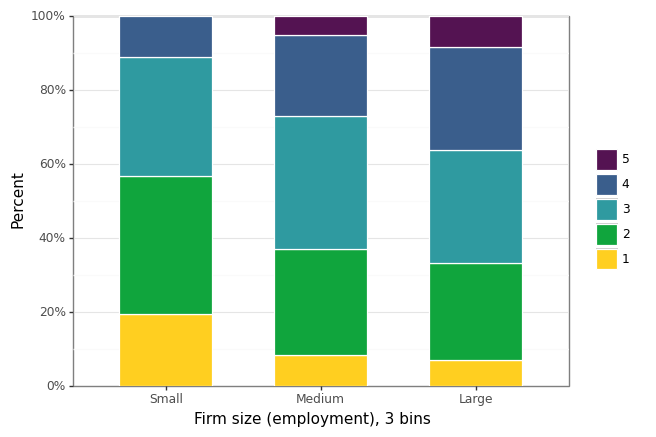

<ggplot: (136974803656)>

In [51]:
ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

<p>Let's plot the second stacked chart before jumping into any conclusions.</p>
<h4>4.1.2 Stacked bar chart | Figure 4.3 (b) Performance tracking</h4>


In [52]:
df2 = pd.DataFrame(
    df.loc[:, ["emp3bins", "perf2"]].groupby(["emp3bins", "perf2"]).agg("size")
).reset_index()

df2.columns = ["emp3bins", "perf2", "Count"]

group_counts = df2.groupby("emp3bins").agg("sum")["Count"]

df2.loc[df2["emp3bins"] == 1, "Percent"] = round(df2.loc[df2["emp3bins"] == 1, "Count"]/group_counts[1],5)
df2.loc[df2["emp3bins"] == 2, "Percent"] = round(df2.loc[df2["emp3bins"] == 2, "Count"]/group_counts[2],5)
df2.loc[df2["emp3bins"] == 3, "Percent"] = round(df2.loc[df2["emp3bins"] == 3, "Count"]/group_counts[3],5)

df2 = df2.assign(
    perf2=pd.Categorical(
        df2["perf2"], categories=sorted(set(df["perf2"]), reverse=True)
    )
)

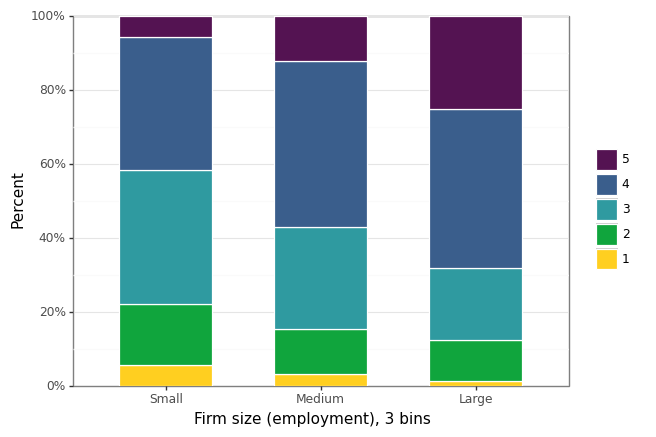

<ggplot: (136974803959)>

In [53]:
ggplot(df2, aes(x="emp3bins", y="Percent", fill="perf2")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

In [56]:
df1, df2

(    emp3bins lean1  Count  Percent
 0        1.0   1.0     14  0.19444
 1        1.0   2.0     27  0.37500
 2        1.0   3.0     23  0.31944
 3        1.0   4.0      8  0.11111
 4        2.0   1.0     13  0.08333
 5        2.0   2.0     45  0.28846
 6        2.0   3.0     56  0.35897
 7        2.0   4.0     34  0.21795
 8        2.0   5.0      8  0.05128
 9        3.0   1.0      5  0.06944
 10       3.0   2.0     19  0.26389
 11       3.0   3.0     22  0.30556
 12       3.0   4.0     20  0.27778
 13       3.0   5.0      6  0.08333,
     emp3bins perf2  Count  Percent
 0        1.0   1.0      4  0.05556
 1        1.0   2.0     12  0.16667
 2        1.0   3.0     26  0.36111
 3        1.0   4.0     26  0.36111
 4        1.0   5.0      4  0.05556
 5        2.0   1.0      5  0.03205
 6        2.0   2.0     19  0.12179
 7        2.0   3.0     43  0.27564
 8        2.0   4.0     70  0.44872
 9        2.0   5.0     19  0.12179
 10       3.0   1.0      1  0.01389
 11       3.0   2.0      8 

<p>As we can see, for both performance scores, the figures display the same pattern association between the quality of management and firm size. Small firms tend to have low scores and a lower probability of displaying high scores than medium-sized firms, which are more likely to have low scores and less likely to have high scores than large firms. When it comes to lean management, scores 4 and 5 take up 11% of small firms (only score 4, as there was no score 5 registered for this firm size). Medium-sized firms registered a percentage of 27pp, while large firms showed an even higher proportion: 36pp. For performance tracking, the corresponding percentages are 40%, 57%, and 68%. These results suggest that <b>larger firms are more likely to be better managed.</p>